In [1]:
import numpy as np
import matplotlib.pyplot as plt
from few.waveform import GenerateEMRIWaveform, FastSchwarzschildEccentricFlux, FastKerrEccentricEquatorialFlux
from few.utils.constants import Gpc, MRSUN_SI, YRSID_SI
from typing import Optional, Union, Callable
from tqdm import tqdm

#try:
#    import cupy as cp
#    use_gpu = True
#except ImportError():
#    print("Not on GPU")
#    use_gpu = False

use_gpu = True

from stableemrifisher.fisher.fisher import StableEMRIFisher
from stableemrifisher.utils import inner_product

if not use_gpu:
    
    import few
    
    #tune few configuration
    cfg_set = few.get_config_setter(reset=True)
    
    cfg_set.enable_backends("cpu")
    cfg_set.set_log_level("info");
    force_backend = 'cpu'
else:
    force_backend = 'gpu'
    pass #let the backend decide for itself.

startup


In [2]:
#waveform class setup
waveform_class = FastSchwarzschildEccentricFlux
waveform_class_kwargs = dict(inspiral_kwargs=dict(err=1e-11,),
                             mode_selector_kwargs=dict(mode_selection_threshold=1e-5))

#waveform generator setup
waveform_generator = GenerateEMRIWaveform
waveform_generator_kwargs = dict(return_list=False)

T = 0.1
dt = 10.0


In [3]:
sef = StableEMRIFisher(waveform_class=waveform_class, 
                       waveform_class_kwargs=waveform_class_kwargs,
                       waveform_generator=waveform_generator,
                       waveform_generator_kwargs=waveform_generator_kwargs,
                      stats_for_nerds = True, use_gpu = use_gpu,
                      deriv_type='stable')

time for derivative init:  2.5399575233459473


In [4]:
m1 = 1e6
m2 = 1e1
a = 0.
p0 = 9.5
e0 = 0.4
xI0 = 1.0
dist = 0.1
qS = np.pi/3
phiS = np.pi/4
qK = np.pi/6
phiK = np.pi/8
Phi_phi0 = 1.0
Phi_theta0 = 0.0
Phi_r0 = 0.0

pars_list = [m1, m2, a, p0, e0, xI0, dist, qS, phiS, qK, phiK, Phi_phi0, Phi_theta0, Phi_r0]
param_names = ['m1']

der_order = 4
Ndelta = 8
stability_plot = True

delta_range = dict(
    m1 = np.geomspace(1e-4*m1, 1e-9*m1, Ndelta),
    m2 = np.geomspace(1e-2*m2, 1e-7*m2, Ndelta),
    p0 = np.geomspace(1e-2*p0, 1e-7*p0, Ndelta),
    e0 = np.geomspace(1e-1*e0, 1e-7*e0, Ndelta),
)

Fisher = sef(*pars_list, param_names = param_names, 
             T = T, dt = dt, 
             der_order = der_order, 
             Ndelta = Ndelta, 
             stability_plot = stability_plot,
             delta_range = delta_range,
            live_dangerously = False)

Body is not plunging, Fisher should be stable.
wave ndim: 2
Computing SNR for parameters: {'m1': 1000000.0, 'm2': 10.0, 'a': 0.0, 'p0': 9.5, 'e0': 0.4, 'xI0': 1.0, 'dist': 0.1, 'qS': 1.0471975511965976, 'phiS': 0.7853981633974483, 'qK': 0.5235987755982988, 'phiK': 0.39269908169872414, 'Phi_phi0': 1.0, 'Phi_theta0': 0.0, 'Phi_r0': 0.0}
Waveform Generated. SNR: 3544.2316640126287
calculating stable deltas...


(ModeSelector) Warning: Overriding include_minus_mkn to True as mode_selection is not a list.


time for trajectory generation:  0.004872798919677734
time for mode selection:  0.01762557029724121
total time for amplitudes generation (first run):  0.02095818519592285
time for waveform generation:  0.13452744483947754
time for trajectory generation:  0.004598140716552734
time for trajectory generation:  0.004843235015869141
time for trajectory generation:  0.0063724517822265625
time for trajectory generation:  0.008701086044311523


(ModeSelector) Warning: Mode selection is large. Instantiate class with mode selection rather than providing it at call time for better performance.
(ModeSelector) Warning: Mode selection is large. Instantiate class with mode selection rather than providing it at call time for better performance.


time for mode selection:  2.49458909034729
total time for amplitudes generation (subsequent run):  2.4956698417663574


(ModeSelector) Warning: Mode selection is large. Instantiate class with mode selection rather than providing it at call time for better performance.


time for mode selection:  1.7194323539733887
total time for amplitudes generation (subsequent run):  1.7203996181488037


(ModeSelector) Warning: Mode selection is large. Instantiate class with mode selection rather than providing it at call time for better performance.


time for mode selection:  1.73710036277771
total time for amplitudes generation (subsequent run):  1.7380001544952393
time for mode selection:  1.7001426219940186
total time for amplitudes generation (subsequent run):  1.70102858543396
Gamma_ii for m1: 2143.4137777649357


(ModeSelector) Warning: Mode selection is large. Instantiate class with mode selection rather than providing it at call time for better performance.


time for waveform generation:  5.698204040527344e-05
time for trajectory generation:  0.004409074783325195
time for trajectory generation:  0.0044977664947509766
time for trajectory generation:  0.004914522171020508
time for trajectory generation:  0.0051996707916259766


(ModeSelector) Warning: Mode selection is large. Instantiate class with mode selection rather than providing it at call time for better performance.


time for mode selection:  1.6517930030822754
total time for amplitudes generation (subsequent run):  1.6526291370391846


(ModeSelector) Warning: Mode selection is large. Instantiate class with mode selection rather than providing it at call time for better performance.


time for mode selection:  1.631577491760254
total time for amplitudes generation (subsequent run):  1.6323800086975098


(ModeSelector) Warning: Mode selection is large. Instantiate class with mode selection rather than providing it at call time for better performance.


time for mode selection:  1.6413111686706543
total time for amplitudes generation (subsequent run):  1.6422162055969238
time for mode selection:  1.7462401390075684
total time for amplitudes generation (subsequent run):  1.747347354888916
Gamma_ii for m1: 2143.413777774054


(ModeSelector) Warning: Mode selection is large. Instantiate class with mode selection rather than providing it at call time for better performance.


time for waveform generation:  5.5789947509765625e-05
time for trajectory generation:  0.004209995269775391
time for trajectory generation:  0.00435948371887207
time for trajectory generation:  0.004420042037963867
time for trajectory generation:  0.0045452117919921875


(ModeSelector) Warning: Mode selection is large. Instantiate class with mode selection rather than providing it at call time for better performance.


time for mode selection:  1.6252472400665283
total time for amplitudes generation (subsequent run):  1.6260907649993896


(ModeSelector) Warning: Mode selection is large. Instantiate class with mode selection rather than providing it at call time for better performance.


time for mode selection:  1.6290271282196045
total time for amplitudes generation (subsequent run):  1.6298272609710693


(ModeSelector) Warning: Mode selection is large. Instantiate class with mode selection rather than providing it at call time for better performance.


time for mode selection:  1.7056784629821777
total time for amplitudes generation (subsequent run):  1.7064704895019531
time for mode selection:  1.7464427947998047
total time for amplitudes generation (subsequent run):  1.7474896907806396
Gamma_ii for m1: 2143.41377770048


(ModeSelector) Warning: Mode selection is large. Instantiate class with mode selection rather than providing it at call time for better performance.


time for waveform generation:  5.459785461425781e-05
time for trajectory generation:  0.00432586669921875
time for trajectory generation:  0.004582405090332031
time for trajectory generation:  0.004671812057495117
time for trajectory generation:  0.005031108856201172


(ModeSelector) Warning: Mode selection is large. Instantiate class with mode selection rather than providing it at call time for better performance.


time for mode selection:  1.782304048538208
total time for amplitudes generation (subsequent run):  1.7832229137420654


(ModeSelector) Warning: Mode selection is large. Instantiate class with mode selection rather than providing it at call time for better performance.


time for mode selection:  1.7757556438446045
total time for amplitudes generation (subsequent run):  1.7767415046691895


(ModeSelector) Warning: Mode selection is large. Instantiate class with mode selection rather than providing it at call time for better performance.


time for mode selection:  1.5061440467834473
total time for amplitudes generation (subsequent run):  1.5069234371185303
time for mode selection:  1.4544882774353027
total time for amplitudes generation (subsequent run):  1.4552574157714844
Gamma_ii for m1: 2143.4137775932927


(ModeSelector) Warning: Mode selection is large. Instantiate class with mode selection rather than providing it at call time for better performance.


time for waveform generation:  4.124641418457031e-05
time for trajectory generation:  0.00412750244140625
time for trajectory generation:  0.0038247108459472656
time for trajectory generation:  0.0038661956787109375
time for trajectory generation:  0.003801584243774414


(ModeSelector) Warning: Mode selection is large. Instantiate class with mode selection rather than providing it at call time for better performance.


time for mode selection:  1.435039758682251
total time for amplitudes generation (subsequent run):  1.435856819152832


(ModeSelector) Warning: Mode selection is large. Instantiate class with mode selection rather than providing it at call time for better performance.


time for mode selection:  1.6292967796325684
total time for amplitudes generation (subsequent run):  1.630324363708496



KeyboardInterrupt



In [12]:
if sef.deriv_type == 'stable': 
    if not sef.has_ResponseWrapper:
        Npad = sef.derivative.cache['Npad'] if sef.derivative.cache['Npad'] > 0 else 1
    else:
        Npad = sef.derivative.waveform_gen.cache['Npad'] if sef.derivative.waveform_gen.cache['Npad'] > 0 else 1
else:
    Npad = 1

In [6]:
wave_gen_base = waveform_generator(waveform_class=waveform_class,
                                   **sef.waveform_generator_kwargs)

In [13]:
if use_gpu:
    import cupy as cp
    xp = cp
else:
    xp = np
    
wave = xp.asarray([xp.concatenate((sef.waveform[i][:-Npad], xp.zeros(Npad)), dtype = sef.waveform.dtype) for i in range(len(sef.waveform))])

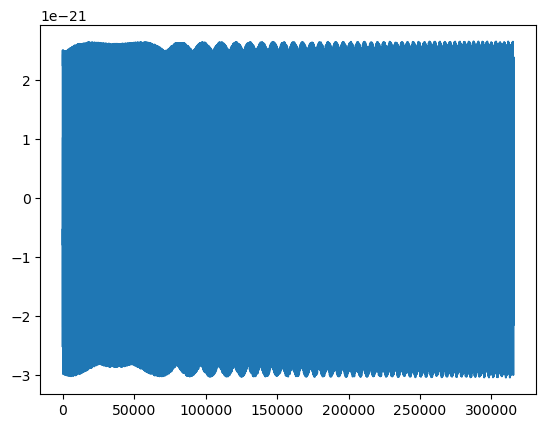

In [14]:
plt.plot(wave.get()[0])

In [15]:
def Fisher_1D(partialh):
    return inner_product(partialh, partialh, PSD = PSD, dt = dt, use_gpu=use_gpu)

sigma1D = 1/np.sqrt(Fisher[0,0])
print(f"sigma", sigma1D)
PSD = sef.PSD_funcs

def likelihood(h_inj, h_temp):
    if len(h_inj) == 1:
        delta = h_inj - h_temp
        delta = [delta.real, -delta.imag]
    else:
        delta = [h_inj[i] - h_temp[i] for i in range(len(h_inj))]
        
    return np.exp(-0.5 * inner_product(delta, delta, PSD = PSD, dt = dt, use_gpu=use_gpu))

N = 50

param_to_vary_range = np.linspace(sef.wave_params[param_names[0]] - 4 * sigma1D, sef.wave_params[param_names[0]] + 4 * sigma1D, N)

likes = []

for i in tqdm(range(N)):
    parameters_in = sef.wave_params.copy()
    parameters_in[param_names[0]] = param_to_vary_range[i]
    htemp = wave_gen_base(
        parameters_in['m1'],
        parameters_in['m2'],
        parameters_in['a'],
        parameters_in['p0'],
        parameters_in['e0'],
        parameters_in['xI0'],
        parameters_in['dist'],
        parameters_in['qS'],
        parameters_in['phiS'],
        parameters_in['qK'],
        parameters_in['phiK'],
        Phi_phi0 = parameters_in['Phi_phi0'],
        Phi_theta0 = parameters_in['Phi_theta0'],
        Phi_r0 = parameters_in['Phi_r0'],
        dt=dt, 
        T=T,
    )

    htemp = xp.concatenate((htemp[:-Npad], xp.zeros(Npad)), dtype = htemp.dtype)

    htemp = xp.asarray([htemp.real, -htemp.imag])

    #plt.plot(htemp.get()[0])
    #plt.plot(wave.get()[0], '--')
    #plt.show()
    
    likes.append(likelihood(wave, htemp))

sigma 0.00016249216967786914


100%|███████████████████████████████████████████| 50/50 [00:04<00:00, 11.94it/s]


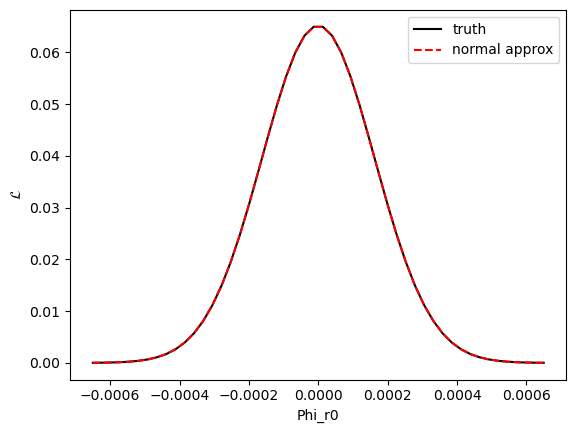

In [16]:
from scipy.stats import norm

normal_approx = norm.pdf(param_to_vary_range, loc = sef.wave_params[param_names[0]], scale = sigma1D)
normal_approx /= np.sum(normal_approx)
plt.plot(param_to_vary_range, likes/np.sum(likes), c='k', label='truth')
plt.plot(param_to_vary_range, normal_approx, c='r', label='normal approx', linestyle='--')
plt.legend()
plt.ylabel(r'$\mathcal{L}$')
plt.xlabel(param_names[0])
plt.savefig(f'1D_like_vs_NA_{param_names[0]}.png', dpi = 300, bbox_inches='tight')
plt.show()